
<span style="text-decoration: underline;color:lightseagreen; font-weight:bold; font-size:xx-large;">CODES FOR P464-MHD COMPUTATION TERM PAPER</span>


<span style="color:teal; font-weight:bold; font-size:x-large;">Gayathri K</span>
</br>
<span style="color:teal; font-weight:bold; font-size:x-large;">2011067</span>



### BASIC CODES

<ul>
<li>Trial 4 : profile 1, Rv=1</li>
<li>Trial 5 : profile 2, Rv=1</li>
<li>Trial 6 : profile 3, Rv=1</li>
</ul>
----------------------------------------------------------------
<ul>
<li>Trial 7 : profile 1, Rv=3</li>
<li>Trial 8 : profile 1, Rv=2</li>
<li>Trial 9 : profile 1, Rv=1---same as 4</li>
<li>Trial 10 : profile 1, Rv=0---no outflow case</li>
<li>Trial 11 : profile 1, Rv=-1</li>
<li>Trial 12 : profile 1, Rv=-2</li>
<li>Trial 12 : profile 1, Rv=-3</li>
</ul>

Importing the required libraries,

In [140]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
import astropy.units as u
from prettytable import PrettyTable
fig_path='figures/new/'
fig_save=True


In [141]:
def animate_to_gif(X_list, Y_lists, T_list, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution', x_lim = None, y_lim = None):
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.xlim(np.min(X_list), np.max(X_list))
    plt.grid()

    def update(frame):
        plt.cla()
        line1 = plt.plot(X_list, Y_lists[frame])
        plt.title(f"{title}, t = {T_list[frame]:.4f} unit time")
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        return line1

    anim = FuncAnimation(figure, update, frames = len(Y_lists))

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

In [142]:
def animate_to_gif_advanced(X_list, Y_listss, T_list, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution', labels=None, x_lim = None, y_lim = None):
    
    N_lines = len(Y_listss)
    if labels is None:
        labels = [str(i) for i in range(N_lines)]
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.xlim(np.min(X_list), np.max(X_list))
    plt.grid()

    def update(frame):
        plt.cla()
        for i in range(N_lines):
            line1 = plt.plot(X_list, Y_listss[i][frame], label=labels[i])
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        plt.legend()
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        plt.title(f"{title}, t = {T_list[frame]:.4f} unit time")
        return line1

    anim = FuncAnimation(figure, update, frames=len(Y_listss[0]))

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

In [143]:
def animate_to_gif_slider(X_list, Y_lists, window, stride, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution at t =', log_scale = False, x_lim = None, y_lim = None):
    '''
    This function creates an animation of the given data in a sliding window and saves it as a gif.
    
    Parameters:
    X_list: 1D array
        The values of the x-axis.
    Y_lists: 1D array
        The values of the y-axis.
        shape: (X_list)
    window: int
        The size of the window.
    stride: int
        The stride of the window.
    file_name: str
        The name of the file to save the gif.
    frames_per_second: int
        The number of frames per second in the gif.
        Default is 25.
    X_label: str
        The label for the x-axis.
        Default is 'X'.
    Y_label: str
        The label for the y-axis.
        Default is 'Y'.
    title: str
        The title of the plot.
        Default is 'Evolution at t ='.
    x_lim: tuple
        The limits of the x-axis.
        Default is None.
    y_lim: tuple
        The limits of the y-axis.
        Default is None.
    '''
    
    # Creating a plot
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.grid()
    
    N_frames = int((len(Y_lists) - window) / stride) + 1

    def update(frame):
        start = frame * stride
        end = start + window
        plt.cla()
        line1 = plt.plot(X_list[start:end], Y_lists[start:end])
        plt.title(f"{title} {X_list[start]:.4f} to {X_list[end-1]:.4f}")
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        if log_scale:
            plt.yscale('log')
        return line1

    anim = FuncAnimation(figure, update, frames = N_frames)

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

In [144]:
def animate_to_gif_slider_advanced(X_list, Y_listss, window, stride, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution at t =', log_scale = False, labels=None, x_lim = None, y_lim = None):
    '''
    This function creates an animation of the given data in a sliding window and saves it as a gif.
    
    Parameters:
    X_list: 1D array
        The values of the x-axis.
    Y_listss: 3D array
        The values of the y-axis.
        shape: (N_lines, len(X_list))
            where N_lines is the number of lines to plot within the same plot.
    file_name: str
        The name of the file to save the gif.
    frames_per_second: int
        The number of frames per second in the gif.
        Default is 25.
    X_label: str
        The label for the x-axis.
        Default is 'X'.
    Y_label: str
        The label for the y-axis.
        Default is 'Y'.
    title: str
        The title of the plot.
        Default is 'Evolution at t ='.
    log_scale: bool
        If True, the y-axis will be in log scale.
    labels: list
        The labels for the different lines.
        Default is None.
        if 2D array, the labels for each line at each frame.
        shape: (N_lines, len(Y_listss))
    x_lim: tuple
        The limits of the x-axis.
        Default is None.
    y_lim: tuple
        The limits of the y-axis.
        Default is None.
    '''
    N_frames = int((Y_listss.shape[1] - window) / stride) + 1
    
    N_lines = Y_listss.shape[0]
    
    if labels is None:
        labels = [str(i) for i in range(N_lines)]
    
    label_2D_flag = False
    if len(labels.shape) == 2:
        label_2D_flag = True
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.grid()

    def update(frame):
        start = frame * stride
        end = start + window
        plt.cla()
        if label_2D_flag:
            for i in range(N_lines):
                line1 = plt.plot(X_list[start:end], Y_listss[i][start:end], label=labels[i][frame])
        else:
            for i in range(N_lines):
                line1 = plt.plot(X_list[start:end], Y_listss[i][start:end], label=labels[i])
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        plt.legend()
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        if log_scale:
            plt.yscale('log')
        plt.title(f"{title} {X_list[start]:.4f} to {X_list[end-1]:.4f}")
        return line1

    anim = FuncAnimation(figure, update, frames=N_frames)

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

trial 1 : no v, field e114 range
trial 2 : no v, h**2/eta

trial 3 : old eta
4: add sin vr,Rv=0
5:rv=-3

TRIAL:1-RV=V=0
trial3:v=sin,rv=-3
trial4:same v,rv=-2,trial 5;rv=-1,6:case2,-3

<span style="text-decoration: underline; font-weight:bold">Initializing the problem.</span>


Defining all the constant parameters we are using, $\eta_t$ and h is kept constant as 1. We are using dimensionless units, the scales are specified wherever required.

In [145]:
#parameters,these are not in dimensional units currently
td_dim=0.733*u.Gyr
r_i_dim = 0.01*u.kpc
r_f_dim= 15.51*u.kpc
h_dim=0.5*u.kpc
eta_dim = h_dim**2/td_dim
omega_0_dim=220*u.km/(u.s*u.kpc)
r_omega_dim=(0.2*r_f_dim)
alpha_dim=1.5*u.km/(u.s)
alpha_cap=1

In [146]:
#now we will make these dimensionless
r_i=(r_i_dim/r_f_dim).value
r_f=(r_f_dim/r_f_dim).value
eta=(eta_dim*td_dim/r_f_dim**2).value
omega_0=(omega_0_dim.to(1/u.Gyr)*(td_dim)).value
r_omega=(r_omega_dim/r_f_dim).value

alpha=(alpha_dim.to(u.kpc/u.Gyr)*(td_dim/r_f_dim)).value
h=(h_dim/r_f_dim).value
td=(td_dim/td_dim).value

In [147]:
#now we need a pretty table with three columns,parameter,value in dimensional and value in dimensionless
table = PrettyTable()
table.field_names = ["Parameter", "Value in Dimensional Units", "Value in Dimensionless Units"]
table.add_row(["r_i", r_i_dim, r_i])
table.add_row(["r_f", r_f_dim, r_f])
table.add_row(["eta", eta_dim, eta])
table.add_row(["omega_0", omega_0_dim, omega_0])
table.add_row(["r_omega", r_omega_dim, r_omega])
table.add_row(["alpha", alpha_dim, alpha])
table.add_row(["h", h_dim, h])
table.add_row(["td", td_dim, td])
print(table)

+-----------+--------------------------------+------------------------------+
| Parameter |   Value in Dimensional Units   | Value in Dimensionless Units |
+-----------+--------------------------------+------------------------------+
|    r_i    |            0.01 kpc            |    0.0006447453255963894     |
|    r_f    |           15.51 kpc            |             1.0              |
|    eta    | 0.34106412005457026 kpc2 / Gyr |    0.0010392413371959855     |
|  omega_0  |       220.0 km / (kpc s)       |      164.9225637352688       |
|  r_omega  |     3.1020000000000003 kpc     |             0.2              |
|   alpha   |           1.5 km / s           |     0.07249980821842306      |
|     h     |            0.5 kpc             |     0.032237266279819474     |
|     td    |           0.733 Gyr            |             1.0              |
+-----------+--------------------------------+------------------------------+


The grid parameters are as follows. 

In [148]:
Nr = 50
Nt = 10000  # Number of radial grid points


First we define the initial conditions and data structure for saving the field components. The initial conditions are chosen as a combination of sine waves, at the end this wont matter because the memory of seed field is lost in dynamo evolution. The values of field over all time and spatial points are stored in a 3-dimensional array, the dimensions being:  (time,component,space).

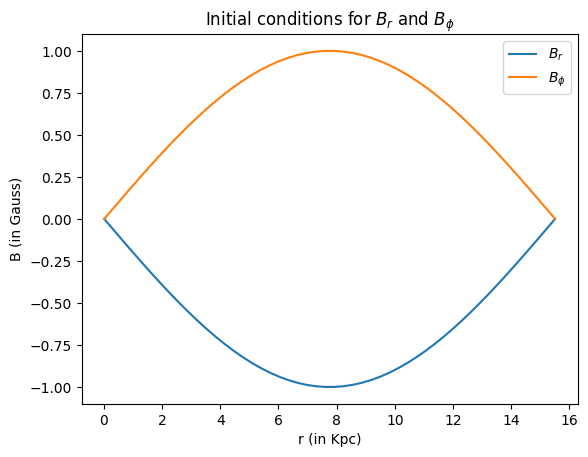

In [180]:
#initial conditions

r = np.linspace(r_i, r_f, Nr)
dr = r[1] - r[0]               

def B_phi0(r):
    return np.sin(np.pi*(r - r_i)/(r_f - r_i))

def B_r0(r):
    return -np.sin(np.pi*(r - r_i)/(r_f - r_i))

B_r = B_r0(r)
B_phi=B_phi0(r)


plt.plot(r*r_f_dim.value,B_r)
plt.xlabel('r (in Kpc)')
plt.ylabel('B (in Gauss)')
plt.plot(r*r_f_dim.value,B_phi)
plt.legend(['$B_r$',r'$B_{\phi}$'])
plt.title(r'Initial conditions for $B_r$ and $B_{\phi}$')
plt.savefig('Initial_conditions_save.png')
plt.show()



### NUMERICAL METHODS IMPLEMENTATION

<span style="text-decoration: underline; font-weight:bold">Schemes to find spatial derivatives</span>



We are using 6th order finite differencing method to find the spatial derivatives. But here we have a very generalised code to use any order finite differencing, with any ghost zone of our need. The codes include 2, 4, 6, 8 and 10th order finite differencing; and symmetric, anti-symmetric and relative-antisymmetric ghost zone.


In [150]:
def spatial_derivative(B_r, B_phi,dr,ghost_zone_type,fd_order):

#GHOST ZONE HANDLING
    B_r=np.copy(B_r)
    B_phi=np.copy(B_phi)

    cell_needed = int(fd_order/2)
    if ghost_zone_type == 'symmetric':
        B_r = np.pad(B_r,(cell_needed,cell_needed),'reflect')
        B_phi = np.pad(B_phi,(cell_needed,cell_needed),'reflect')
    elif ghost_zone_type == 'smooth':
        B_r = np.pad(B_r,(cell_needed,cell_needed),'reflect',reflect_type='odd')
        B_phi = np.pad(B_phi,(cell_needed,cell_needed),'reflect',reflect_type='odd')
    elif ghost_zone_type == 'anti-symmetric':
        B_r = np.pad(B_r,(cell_needed,cell_needed),'reflect')
        B_phi = np.pad(B_phi,(cell_needed,cell_needed),'reflect') 
        for i in range(1,cell_needed+1):
            B_r[cell_needed-i] = -B_r[cell_needed-i]
            B_r[-cell_needed-1+i]=-B_r[-cell_needed-1+i]
            B_phi[cell_needed-i] = -B_phi[cell_needed-i]
            B_phi[-cell_needed-1+i]=-B_phi[-cell_needed-1+i]
      
    elif ghost_zone_type == 'relative anti-symmetric':
        B_r = np.pad(B_r,(cell_needed,cell_needed),'constant')
        B_phi = np.pad(B_phi,(cell_needed,cell_needed),'constant')
        for i in range (1,cell_needed+1):
            B_r[cell_needed-i] = 2*B_r[cell_needed] - B_r[cell_needed+i]
            B_r[-cell_needed-1+i]=2*B_r[-cell_needed-1] - B_r[-cell_needed-1-i]
            B_phi[cell_needed-i] = 2*B_phi[cell_needed] - B_phi[cell_needed+i]
            B_phi[-cell_needed-1+i]=2*B_phi[-cell_needed-1] - B_phi[-cell_needed-1-i]
    else:
        B_r = np.pad(B_r,(cell_needed,cell_needed),'constant')
        B_phi = np.pad(B_phi,(cell_needed,cell_needed),'constant')

#FINITE DIFFERENCE
    
    if fd_order == 2:
        dB_r_dr = (-B_r[:-2] + B_r[1:])/(2*dr)
        dB_phi_dr = (-B_phi[:-2] + B_phi[1:])/(2*dr)
        d_sq_Br_dr = (B_r[:-2]-2*B_r[1:-1]+B_r[1:])/(dr**2)
        d_sq_Bphi_dr = (B_phi[:-2]-2*B_phi[1:-1]+B_phi[1:])/(dr**2)

    elif fd_order == 4:
        dB_r_dr = (B_r[:-4] - (8*B_r[1:-3]) + (8*B_r[3:-1]) - B_r[4:]) / (12*dr)
        dB_phi_dr = (B_phi[:-4] - (8*B_phi[1:-3]) + (8*B_phi[3:-1]) - B_phi[4:]) / (12*dr)
        d_sq_Br_dr = ((-B_r[:-4]) + (16*B_r[1:-3]) + (-30*B_r[2:-2]) + (16*B_r[3:-1]) (-B_r[4:])) / (12*(dr**2))
        d_sq_Bphi_dr = ((-B_phi[:-4]) + (16*B_phi[1:-3]) + (-30*B_phi[2:-2]) + (16*B_phi[3:-1]) (-B_phi[4:])) / (12*(dr**2))

    elif fd_order == 6:
        dB_r_dr = ((-B_r[:-6]) + (9 * B_r[1:-5]) - (45*B_r[2:-4]) + (45*B_r[4:-2]) - (9*B_r[5:-1]) + B_r[6:]) / (60*dr)
        dB_phi_dr = ((-B_phi[:-6]) + (9 * B_phi[1:-5]) - (45*B_phi[2:-4]) + (45*B_phi[4:-2]) - (9*B_phi[5:-1]) + B_phi[6:]) / (60*dr)
        d_sq_Br_dr = ((2*B_r[:-6]) - (27*B_r[1:-5]) + (270*B_r[2:-4]) - (490*B_r[3:-3]) + (270*B_r[4:-2]) - (27*B_r[5:-1]) + (2*B_r[6:])) / (180*(dr**2))
        d_sq_Bphi_dr = ((2*B_phi[:-6]) - (27*B_phi[1:-5]) + (270*B_phi[2:-4]) - (490*B_phi[3:-3]) + (270*B_phi[4:-2]) - (27*B_phi[5:-1]) + (2*B_phi[6:])) / (180*(dr**2))

    elif fd_order == 8:
        dB_r_dr = ((3*B_r[:-8]) - (32*B_r[1:-7]) + (168*B_r[2:-6]) - (672*B_r[3:-5]) + (672*B_r[5:-3]) - (168*B_r[6:-2]) + (32*B_r[7:-1]) - (3*B_r[8:])) / (840*dr)
        dB_phi_dr = ((3*B_phi[:-8]) - (32*B_phi[1:-7]) + (168*B_phi[2:-6]) - (672*B_phi[3:-5]) + (672*B_phi[5:-3]) - (168*B_phi[6:-2]) + (32*B_phi[7:-1]) - (3*B_phi[8:])) / (840*dr)
        d_sq_Br_dr = ((-9*B_r[:-8]) + (128*B_r[1:-7]) - (1008*B_r[2:-6]) + (8064*B_r[3:-5]) - (14350*B_r[4:-4]) + (8064*B_r[5:-3]) - (1008*B_r[6:-2]) + (128*B_r[7:-1]) - (9*B_r[8:])) / (5040*(dr**2))
        d_sq_Bphi_dr = ((-9*B_phi[:-8]) + (128*B_phi[1:-7]) - (1008*B_phi[2:-6]) + (8064*B_phi[3:-5]) - (14350*B_phi[4:-4]) + (8064*B_phi[5:-3]) - (1008*B_phi[6:-2]) + (128*B_phi[7:-1]) - (9*B_phi[8:])) / (5040*(dr**2))

    elif fd_order == 10:
        dB_r_dr = ((-2*B_r[:-10]) + (25*B_r[1:-9]) - (150*B_r[2:-8]) + (600*B_r[3:-7]) - (2100*B_r[4:-6]) + (2100*B_r[6:-4]) - (600*B_r[7:-3]) + (150*B_r[8:-2]) - (25*B_r[9:-1]) + (2*B_r[10:])) / (2520*dr)
        dB_phi_dr = ((-2*B_phi[:-10]) + (25*B_phi[1:-9]) - (150*B_phi[2:-8]) + (600*B_phi[3:-7]) - (2100*B_phi[4:-6]) + (2100*B_phi[6:-4]) - (600*B_phi[7:-3]) + (150*B_phi[8:-2]) - (25*B_phi[9:-1]) + (2*B_phi[10:])) / (2520*dr)
        d_sq_Br_dr = ((8*B_r[:-10]) - (125*B_r[1:-9]) + (1000*B_r[2:-8]) - (6000*B_r[3:-7]) + (42000*B_r[4:-6]) - (73766*B_r[5:-5]) + (42000*B_r[6:-4]) - (6000*B_r[7:-3]) + (1000*B_r[8:-2]) - (125*B_r[9:-1]) + (8*B_r[10:])) / (25200*(dr**2))
        d_sq_Bphi_dr = ((8*B_phi[:-10]) - (125*B_phi[1:-9]) + (1000*B_phi[2:-8]) - (6000*B_phi[3:-7]) + (42000*B_phi[4:-6]) - (73766*B_phi[5:-5]) + (42000*B_phi[6:-4]) - (6000*B_phi[7:-3]) + (1000*B_phi[8:-2]) - (125*B_phi[9:-1]) + (8*B_phi[10:])) / (25200*(dr**2))

    else:
        print('Invalid order of finite difference')
        return

    return dB_r_dr, dB_phi_dr, d_sq_Br_dr, d_sq_Bphi_dr
       
        


In [151]:
def first_der(f_,dr,ghost_zone_type=None,order=6):
    #GHOST ZONE HANDLING

    cell_needed = int(order/2)
    if ghost_zone_type == 'symmetric':
        f_ = np.pad(f_,(cell_needed,cell_needed),'reflect')
       
    elif ghost_zone_type == 'smooth':
        f_ = np.pad(f_,(cell_needed,cell_needed),'reflect',reflect_type='odd')
    elif ghost_zone_type == 'anti-symmetric':
        f_ = np.pad(f_,(cell_needed,cell_needed),'reflect')
        for i in range(1,cell_needed+1):
            f_[cell_needed-i] = -f_[cell_needed-i]
            f_[-cell_needed-1+i]=-f_[-cell_needed-1+i]
      
        
    elif ghost_zone_type == 'relative anti-symmetric':
        f_ = np.pad(f_,(cell_needed,cell_needed),'constant')
        for i in range (1,cell_needed+1):
            f_[cell_needed-i] = 2*f_[cell_needed] - f_[cell_needed+i]
            f_[-cell_needed-1+i]=2*f_[-cell_needed-1] - f_[-cell_needed-1-i]
    else:
        f_ = np.pad(f_,(cell_needed,cell_needed),'constant')

    #FINITE DIFFERENCE
    if order == 2:
        df__dr = (-f_[:-2] + f_[1:])/(2*dr)
    
    elif order == 4:
        df__dr = (f_[:-4] - (8*f_[1:-3]) + (8*f_[3:-1]) - f_[4:]) / (12*dr)

    elif order == 6:
        df__dr = ((-f_[:-6]) + (9 * f_[1:-5]) - (45*f_[2:-4]) + (45*f_[4:-2]) - (9*f_[5:-1]) + f_[6:]) / (60*dr)

    elif order == 8:
        df__dr = ((3*f_[:-8]) - (32*f_[1:-7]) + (168*f_[2:-6]) - (672*f_[3:-5]) + (672*f_[5:-3]) - (168*f_[6:-2]) + (32*f_[7:-1]) - (3*f_[8:])) / (840*dr)
    
    elif order == 10:
        df__dr = ((-2*f_[:-10]) + (25*f_[1:-9]) - (150*f_[2:-8]) + (600*f_[3:-7]) - (2100*f_[4:-6]) + (2100*f_[6:-4]) - (600*f_[7:-3]) + (150*f_[8:-2]) - (25*f_[9:-1]) + (2*f_[10:])) / (2520*dr)
        
    else:
        print('Invalid order of finite difference')
        return

    return df__dr
       


In [152]:

# R_alpha=alpha#*h/eta
# R_omega=neg_q_omega#*(h**2)/eta
# D=R_alpha*R_omega

# plt.plot(r*h_dim,D)
# plt.xlabel('r (in Kpc)')
# plt.ylabel('D (dimensionless)')
# plt.title('Dynamo number vs r')
# plt.show()


In [153]:
omega = omega_0*(1 + (r/r_omega)**2)**(-1/2)

der_omega=(first_der(omega,dr,ghost_zone_type='smooth',order=6))
V_r=np.sin(np.pi*r)
#V_r = np.where(r <= r_omega, -np.sin(np.pi * r / r_omega), np.sin(np.pi * (r - r_omega) / (r_f - r_omega)))
#V_r = np.where(r <= r_omega, -np.sin(np.pi * r / r_omega), 0)

dVdr=first_der(V_r,dr,ghost_zone_type='smooth',order=6)

lamda=0.05
R_alpha=1
R_omega=10
R_v=3 #change






In [154]:
def dB_r_dt(B_r,B_phi,V_r,db_r_dr,d_sq_Br_dr,dVdr,dt):
    return -lamda*R_v*V_r*db_r_dr -lamda*R_v*V_r*B_r/r- R_alpha*B_phi -B_r +lamda**2* d_sq_Br_dr + lamda**2*db_r_dr/r -lamda**2* B_r/(r**2)
def dB_phi_dt(B_phi,B_r,V_r,db_phi_dr,d_sq_Bphi_dr,dVdr,dt):
    return -lamda*R_v*B_phi*dVdr-lamda*R_v*V_r*db_phi_dr+R_omega*r*B_r*der_omega-B_phi+lamda**2* d_sq_Bphi_dr + lamda**2*db_phi_dr/r -lamda**2* B_phi/(r**2)


In [155]:
import numpy as np
from tqdm import tqdm

def simulate_B_field_till_steady(r_i, r_f, Nr, Nt_per_unitT, B_r0, B_phi0,V_r,dVdr, dBrdt, dBphidt, order=6, ghost_zone_type='relative anti-symmetric', iterations_to_save=None, global_growth_rate_tolerance=1e-2,  max_iterations=100):
    
    dt = 1 / Nt_per_unitT  # Temporal step size

    # Create arrays to store the solution in time
    B_r = B_r0(np.linspace(r_i, r_f, Nr))
    B_phi = B_phi0(np.linspace(r_i, r_f, Nr))
    B_list = [[np.copy(B_r)], [np.copy(B_phi)]]

    if iterations_to_save is None:
        iterations_to_save = [0, Nt_per_unitT]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(Nt_per_unitT + 1))

   

    N_unitT_passed = 0
    iterations_below_tolerance = 0

    N_datapoints_to_check = int(Nt_per_unitT*0.1)

    growth_B_list=[]

    while True:
        
        for i in tqdm(range(1, Nt_per_unitT + 1), desc=f"{N_unitT_passed + 1}th "):
            # Compute spatial derivatives
            db_r_dr, db_phi_dr, d_sq_Br_dr, d_sq_Bphi_dr = spatial_derivative(B_r, B_phi, dr, ghost_zone_type, 6)

            k1_r = dB_r_dt(B_r, B_phi, V_r, db_r_dr, d_sq_Br_dr, dVdr, dt)
            k1_phi = dB_phi_dt(B_phi, B_r, V_r, db_phi_dr, d_sq_Bphi_dr, dVdr, dt)

            # Compute k2 values
            k2_r = dB_r_dt(B_r + 0.5*dt*k1_r, B_phi + 0.5*dt*k1_phi, V_r, db_r_dr, d_sq_Br_dr, dVdr, dt)
            k2_phi = dB_phi_dt(B_phi + 0.5*dt*k1_phi, B_r + 0.5*dt*k1_r, V_r, db_phi_dr, d_sq_Bphi_dr, dVdr, dt)

            # Compute k3 values
            k3_r = dB_r_dt(B_r + 0.5*dt*k2_r, B_phi + 0.5*dt*k2_phi, V_r, db_r_dr, d_sq_Br_dr, dVdr, dt)
            k3_phi = dB_phi_dt(B_phi + 0.5*dt*k2_phi, B_r + 0.5*dt*k2_r, V_r, db_phi_dr, d_sq_Bphi_dr, dVdr, dt)

            # Compute k4 values
            k4_r = dB_r_dt(B_r + dt*k3_r, B_phi + dt*k3_phi, V_r, db_r_dr, d_sq_Br_dr, dVdr, dt)
            k4_phi = dB_phi_dt(B_phi + dt*k3_phi, B_r + dt*k3_r, V_r, db_phi_dr, d_sq_Bphi_dr, dVdr, dt)

            B_r = B_r + (dt/6)*(k1_r + 2*k2_r + 2*k3_r + k4_r)
            B_phi = B_phi + (dt/6)*(k1_phi + 2*k2_phi + 2*k3_phi + k4_phi)
            
           
            if i in iterations_to_save:
                B_list[0].append(np.copy(B_r))
                B_list[1].append(np.copy(B_phi))


            if i > (Nt_per_unitT - N_datapoints_to_check):
                growth_B_list.append(np.copy([B_r, B_phi]))
    # ------------------------------------------#

        growth_B_list = np.array(growth_B_list)
       

        N_unitT_passed += 1

    
        gammas = []
        
        B_strength = np.sqrt(growth_B_list[:, 0] ** 2 + growth_B_list[:, 1] ** 2).T
       
        curr_time = np.linspace(Nt_per_unitT * (N_unitT_passed - 0.1) + 1,
                                    (Nt_per_unitT * N_unitT_passed), N_datapoints_to_check) * (1 / Nt_per_unitT)
        # print(f'Shape of B_strength is {B_strength.shape} and shape of curr_time is {curr_time.shape}')
        for i in range(Nr):
            slope, _ = np.polyfit(curr_time, np.log(B_strength[i]), 1)
            
            gammas.append(slope)
        gammas = np.array(gammas)
        mean_gamma = np.mean(gammas)
        gammas = np.abs(gammas - mean_gamma)
        mean_diff = np.mean(gammas)
        print(f"Current mean variation: {mean_diff:.5f}")
        if (gammas < global_growth_rate_tolerance).all():
            if iterations_below_tolerance == 0:
                print(f"System has reached steady state after {N_unitT_passed} unit times. Patience interval started..")
            iterations_below_tolerance += 1
        else:
            if iterations_below_tolerance > 0:
                print(f"System did not maintain steady state. Patience interval reset..")
            iterations_below_tolerance = 0
        if iterations_below_tolerance >= 3:
            break
        growth_B_list = []
       
        if N_unitT_passed == max_iterations:
            break
    trial_name= 'TRIAL13'
    B_list = np.array(B_list)
    np.save(f'{trial_name}B_list.npy', B_list)
    np.save(f'{trial_name}gamma.npy', gammas)
    
    return B_list,gammas


In [156]:
frames_per_unitT = 25 # number of frames per unit time
iterations_to_save_plot = [int(i * (Nt/ frames_per_unitT)) for i in range(0, frames_per_unitT + 1)] # saving only for the frames


In [157]:
B_list_antisymm, mean_gamma_antisymm = simulate_B_field_till_steady(
    r_i,  # Initial value of the radial coordinate
    r_f,  # Final value of the radial coordinate
    Nr,  # Number of spatial points
    Nt,  # Number of time points per unit time
    B_r0,  # Initial condition function for the radial component of B
    B_phi0,
      V_r,
      dVdr,  # Initial condition function for the azimuthal component of B
    dB_r_dt,  # Function defining the time derivative of the radial component of B
    dB_phi_dt,  # Function defining the time derivative of the azimuthal component of B
    order=6,  # Order of the finite difference scheme
    ghost_zone_type='anti-symmetric',  # Type of the ghost zone
    iterations_to_save=iterations_to_save_plot,  # List of time iterations to save
    global_growth_rate_tolerance=1e-2,  # Tolerance for global growth rate
      # Number of unit times to wait before stopping simulation
    max_iterations=100  # Maximum number of iterations
)

1th : 100%|██████████| 10000/10000 [00:11<00:00, 900.34it/s]


Current mean variation: 1.28580


2th : 100%|██████████| 10000/10000 [00:10<00:00, 926.60it/s]


Current mean variation: 0.58962


3th : 100%|██████████| 10000/10000 [00:10<00:00, 970.27it/s]


Current mean variation: 0.26861


4th : 100%|██████████| 10000/10000 [00:11<00:00, 879.20it/s]


Current mean variation: 0.18928


5th : 100%|██████████| 10000/10000 [00:13<00:00, 739.14it/s]


Current mean variation: 0.08446


6th : 100%|██████████| 10000/10000 [00:12<00:00, 780.66it/s]


Current mean variation: 0.03207


7th : 100%|██████████| 10000/10000 [00:10<00:00, 915.41it/s]


Current mean variation: 0.01127


8th : 100%|██████████| 10000/10000 [00:13<00:00, 742.00it/s]


Current mean variation: 0.00381


9th : 100%|██████████| 10000/10000 [00:11<00:00, 905.86it/s]


Current mean variation: 0.00127
System has reached steady state after 9 unit times. Patience interval started..


10th : 100%|██████████| 10000/10000 [00:10<00:00, 969.38it/s]


Current mean variation: 0.00042


11th : 100%|██████████| 10000/10000 [00:10<00:00, 932.36it/s]

Current mean variation: 0.00014


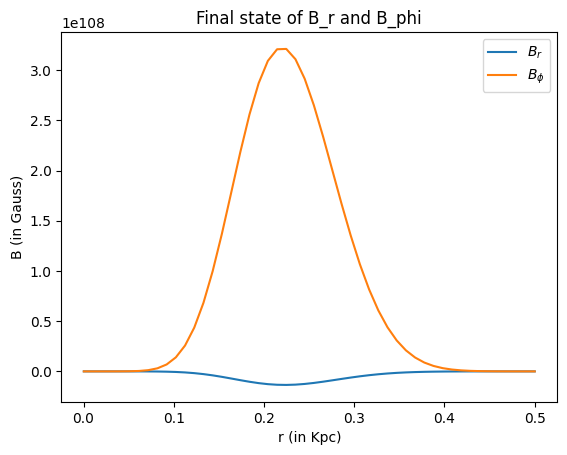

(50,)
(2, 276, 50)


In [158]:
#plot the b_phi and b_r
B_r_antisymm = B_list_antisymm[0][-1]
B_phi_antisymm = B_list_antisymm[1][-1]
r = np.linspace(r_i, r_f, Nr)
plt.plot(r*h_dim, B_r_antisymm)
plt.plot(r*h_dim, B_phi_antisymm)
plt.xlabel('r (in Kpc)')
plt.ylabel('B (in Gauss)')
plt.legend(['$B_r$', '$B_{\phi}$'])
plt.title('Final state of B_r and B_phi')

plt.show()
print(mean_gamma_antisymm.shape)
print(B_list_antisymm.shape)


In [159]:
trial_name_ = 'TRIAL13'
# trial+name_ = 'trial1_'

B_list = np.load(trial_name_ + 'B_list.npy')
print(B_list.shape)

(2, 276, 50)


In [160]:
#SWAP AXIS FOR B_LIST
B_list = np.swapaxes(B_list, 0, 1)
print(B_list.shape)


(276, 2, 50)


In [161]:
total_time = (((B_list.shape)[0] - 1) // frames_per_unitT)
times = np.linspace(0, total_time, B_list.shape[0])
    
print(times.shape)

(276,)


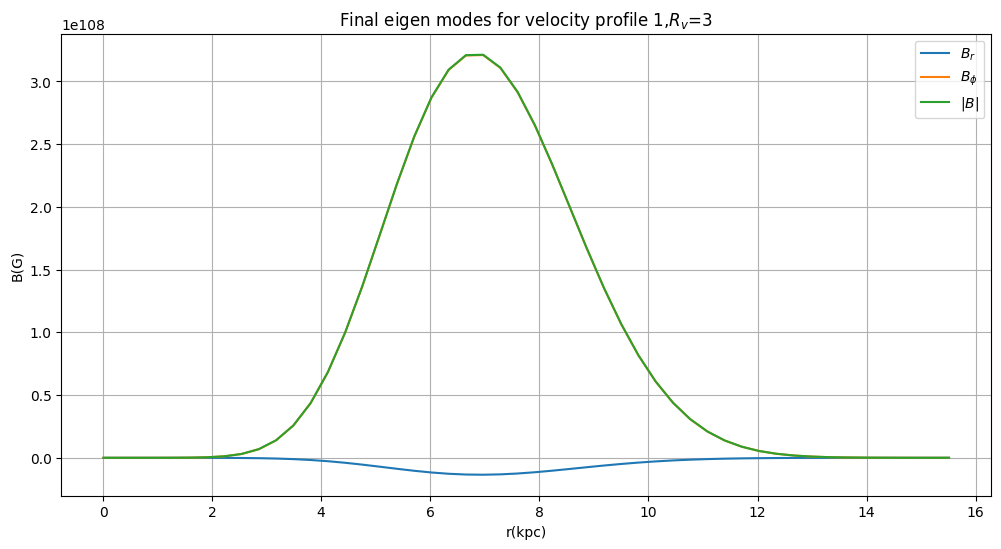

In [162]:
# plotting final eigen modes
plt.figure(figsize=(12, 6))
plt.plot(r*r_f_dim.value, B_list[-1, 0], label = r'$B_r$')
plt.plot(r*r_f_dim.value, B_list[-1, 1], label = r'$B_{\phi}$')
plt.plot(r*r_f_dim.value, np.sqrt(B_list[-1, 0] ** 2 + B_list[-1, 1] ** 2), label = r'$|B|$')
plt.xlabel('r(kpc)')
plt.ylabel('B(G)')
plt.title(r'Final eigen modes for velocity profile 1,$R_v$=3')
plt.legend()
plt.grid()
if fig_save:
    plt.savefig(fig_path + trial_name_ + 'Final_eigen_modes.png')
plt.show()

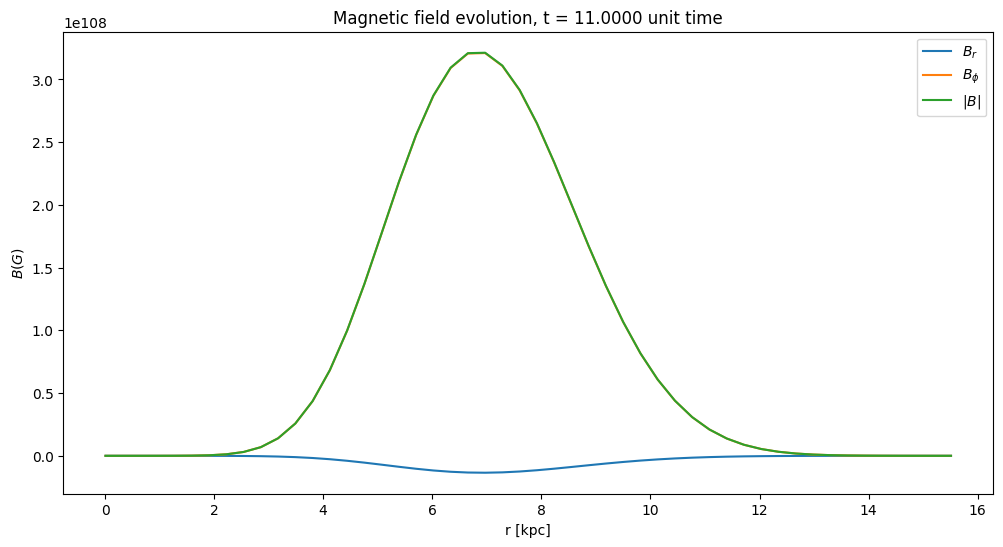

In [163]:
animate_to_gif_advanced(r*r_f_dim.value, [B_list[:,0], B_list[:,1], np.sqrt((B_list[:,0] ** 2) + (B_list[:,1] ** 2))], times, trial_name_ + 'B_evol.gif', frames_per_second=frames_per_unitT, X_label=r"r [kpc]", Y_label=r"$B(G)$", title=r"Magnetic field evolution", labels = [r"$B_r$",r"$B_{\phi}$",r"$|B|$"])

In [164]:
# plotting the B_r, B_phi and |B| wr.t. t at certain r indices

r_indices = np.linspace(2, 26, 6) # 7 points in focus
r_indices = r_indices.astype(int)
r_vals_at_indices = r[r_indices]

B_strength_list = np.sqrt(B_list[:,0]**2 + B_list[:,0]**2)

In [165]:
def B_list_growth_analyzer(times, B_str_list, window = 25, stride = 1):
    '''
    This function analyzes the growth of the magnetic field B to calculate growth rate across r over time, and return the data.
    
    Parameters:
    times: 1D array
        The time values corresponding to the B_list.
    B_str_list: 3D array
        The solution of the magnetic field strength B in time. 
        shape: (len(times), Nr)
        
    Returns:
    all_times: 1D array
        The time values corresponding to the growth rates.
    all_gammas: 2D array
        The growth rates across r over time.
        shape: (len(times), Nr)
    '''
    
    all_gammas = []
    all_times = []
    
    N_data = int((len(times) - window) / stride) + 1
    
    for i in range(N_data):
        start = i * stride
        end = start + window
        
        B_str = B_str_list[start:end]
        gammas = []
        for j in range(B_str.shape[1]):
            slope, _ = np.polyfit(times[start:end], np.log(B_str[:, j]), 1)
            gammas.append(slope)
        all_gammas.append(gammas)
        all_times.append(times[end-1])

    all_times = np.array(all_times)
    all_gammas = np.array(all_gammas)
    
    return all_times, all_gammas

/tmp/ipykernel_3723/1483822731.py:32: RuntimeWarning: divide by zero encountered in log
  slope, _ = np.polyfit(times[start:end], np.log(B_str[:, j]), 1)


(252,)
(252, 50)


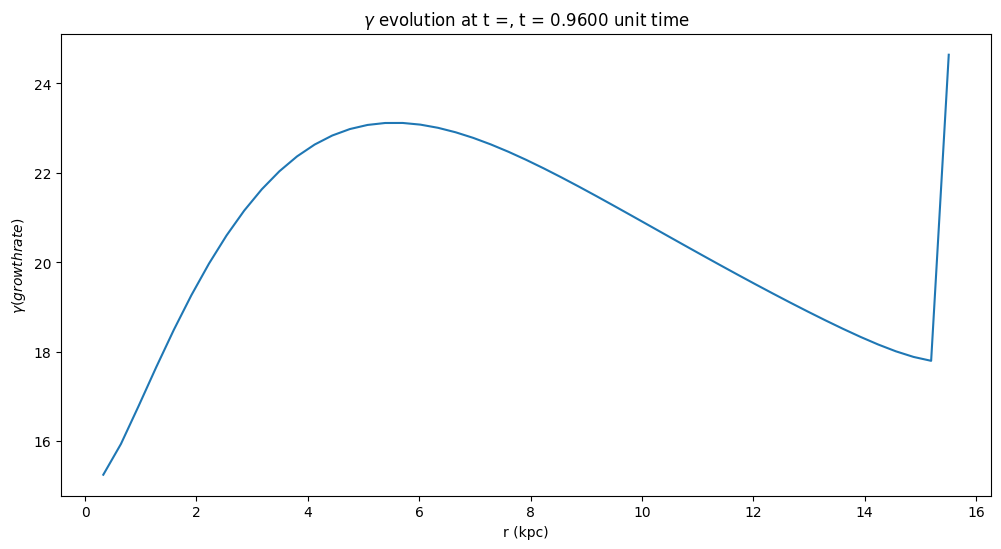

In [166]:
all_times, all_gammas = B_list_growth_analyzer(times, B_strength_list, window = frames_per_unitT, stride = 1)
print(all_times.shape)
print(all_gammas.shape)


animate_to_gif(r*r_f_dim.value, all_gammas, all_times, trial_name_+ 'gamma_evolution.gif', frames_per_second = frames_per_unitT, X_label = 'r (kpc)', Y_label = r'$\gamma (growth rate)$', title = r'$\gamma$ evolution at t =')

(276,)
(276, 6)


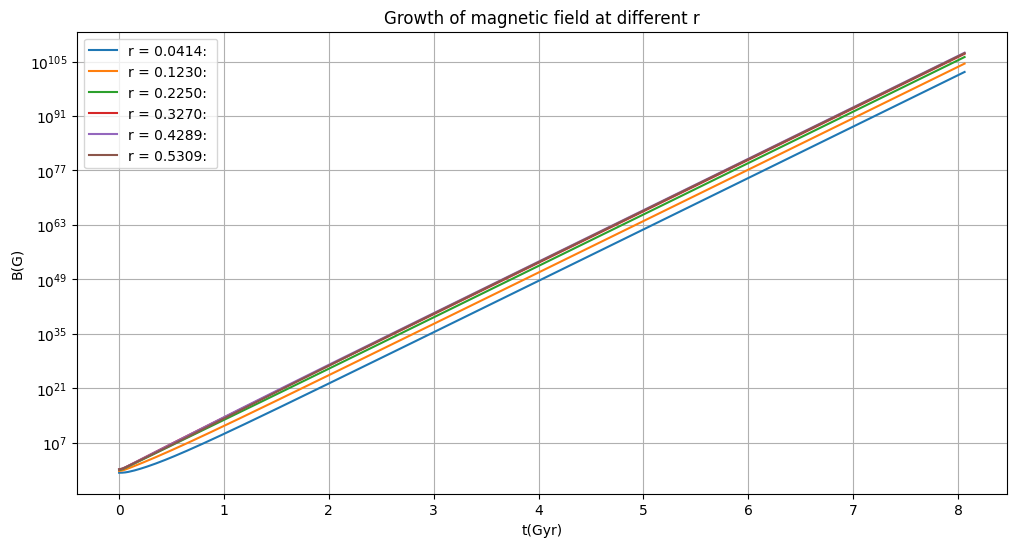

In [167]:
r_labels = [f'r = {r_vals_at_indices[i]:.4f}: ' for i in range(len(r_indices))]

r_labels2 = [[f'r = {r_vals_at_indices[i]:.4f}: slope = {all_gammas[j, i]:.4f}' for i in range(len(r_indices))] for j in range(all_gammas.shape[0])]
r_labels = np.array(r_labels)
r_labels2 = np.array(r_labels2)
print(times.shape)
print(B_strength_list[:, r_indices].shape)

# plotting the growth of the magnetic field at certain r indices in log scale for full time
plt.figure(figsize=(12, 6))
for i in range(len(r_indices)):
    plt.plot(times*td_dim.value, B_strength_list[:, r_indices[i]], label = r_labels[i])
plt.xlabel('t(Gyr)')
plt.ylabel(r'B(G)')
plt.title(r'Growth of magnetic field at different r')
plt.yscale('log')
plt.legend()
plt.grid()
if fig_save:
    plt.savefig(fig_path + trial_name_+ 'B_growth_at_r_indices_all_time.png')
plt.show()

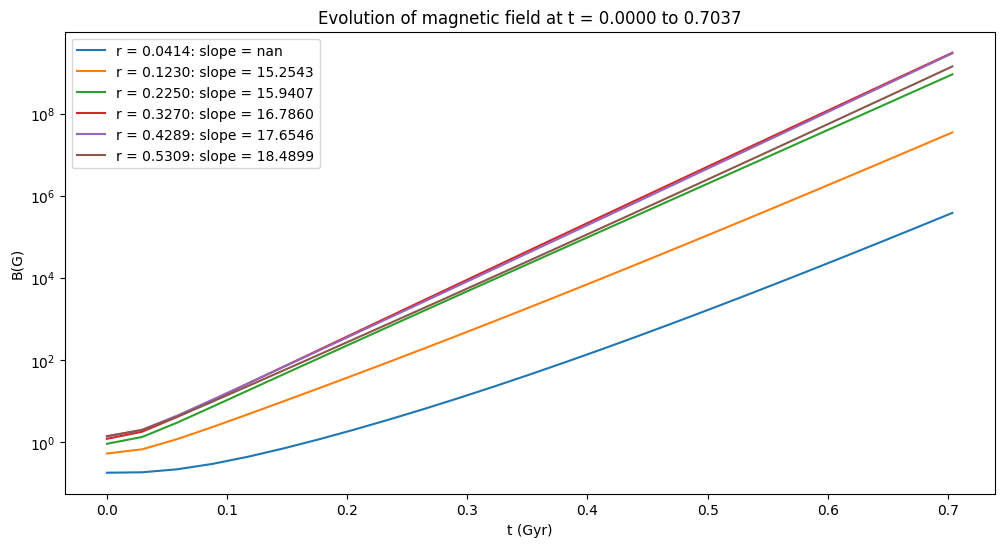

In [168]:
animate_to_gif_slider_advanced(times*td_dim.value, B_strength_list[:, r_indices].T, window = frames_per_unitT, stride = 1, file_name = trial_name_ + 'B_strength_evolution_slider_at_diff_r.gif', frames_per_second = frames_per_unitT, X_label = 't (Gyr)', Y_label = 'B(G)', title = 'Evolution of magnetic field at t =', log_scale = True, labels = r_labels2.T)

In [169]:
pitch_angles = np.arctan(B_list[:,0]/B_list[:,1]) * 180 / np.pi
print(pitch_angles.shape)
print(type(pitch_angles[0,0]), pitch_angles[0,0])
# animate_to_gif(r, pitch_angles, times, f"{trial_name}pitch_angle_evolution.gif", frames_per_second=frames_per_unitT, X_label=r"r [kpc]", Y_label=r"$\theta$ [degrees]", title=r"Pitch angle evolution")

(276, 50)
<class 'numpy.float64'> nan


/tmp/ipykernel_3723/443814250.py:1: RuntimeWarning: invalid value encountered in divide
  pitch_angles = np.arctan(B_list[:,0]/B_list[:,1]) * 180 / np.pi


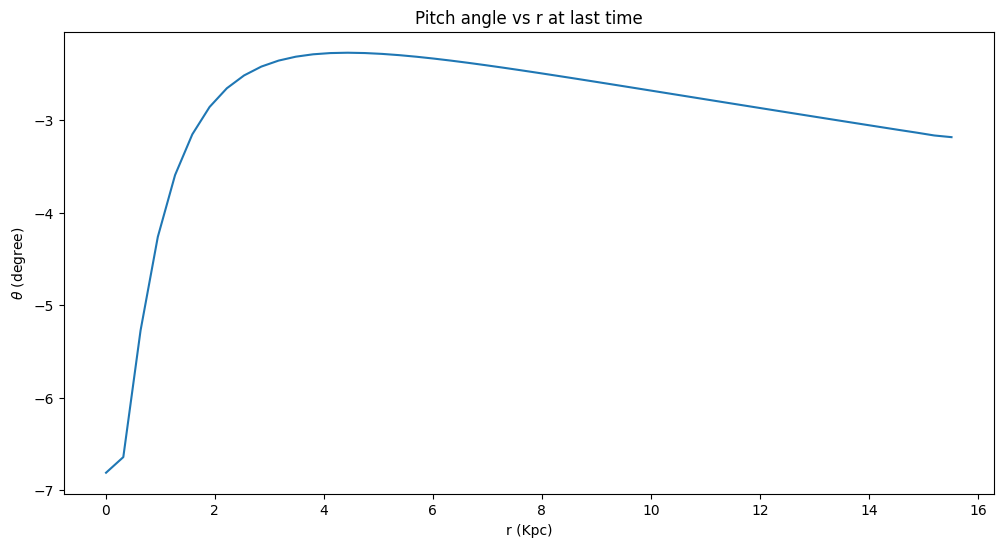

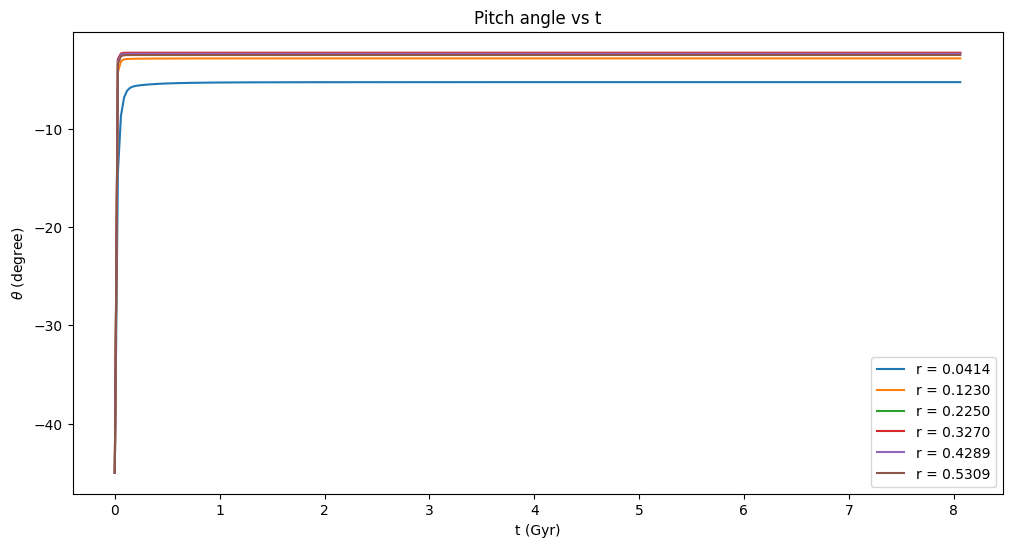

In [170]:
# plotting the pitch angle vs r at last time
plt.figure(figsize=(12, 6))
plt.plot(r*r_f_dim.value, pitch_angles[-1])
plt.xlabel('r (Kpc)')
plt.ylabel(r'$\theta$ (degree)')
plt.title(r'Pitch angle vs r at last time')
if fig_save:
    plt.savefig(fig_path + trial_name_ + 'pitch_angle_vs_r_at_last_time.png')
plt.show()

# plotting the pitch angle vs t for certain r indices
plt.figure(figsize=(12, 6))
for i in range(len(r_indices)):
    plt.plot(times*td_dim.value, pitch_angles[:, r_indices[i]], label = f'r = {r_vals_at_indices[i]:.4f}')
plt.xlabel('t (Gyr)')
plt.ylabel(r'$\theta$ (degree)')
plt.title(r'Pitch angle vs t')
plt.legend()
if fig_save:
    plt.savefig(fig_path + trial_name_ + 'pitch_angle_vs_t_at_diff_r.png')
plt.show()

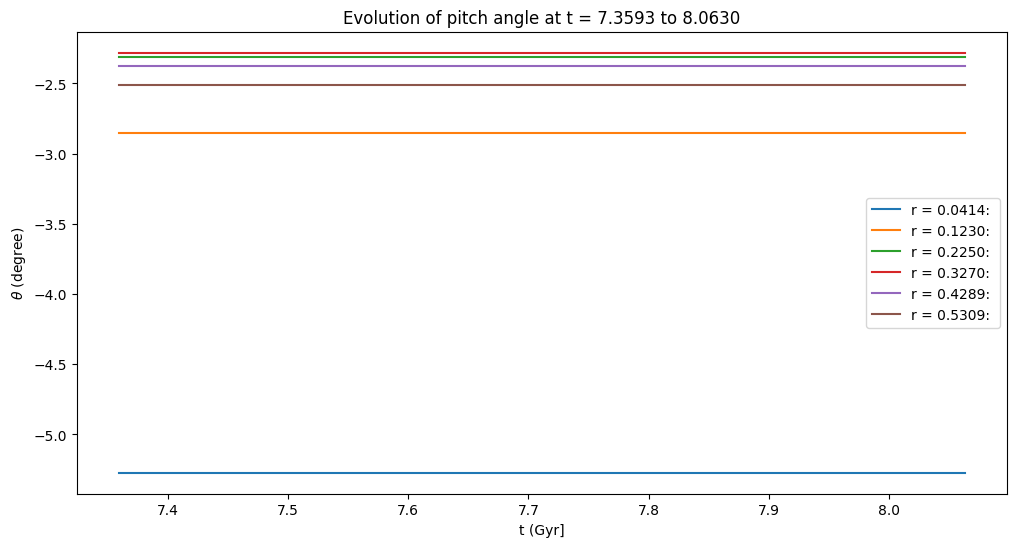

In [171]:
# pitch angle at different r values
animate_to_gif_slider_advanced(times*td_dim.value, pitch_angles[:, r_indices].T, window = frames_per_unitT, stride = 1, file_name = trial_name_ + 'pitch_angle_evolution_slider_at_diff_r.gif', frames_per_second = frames_per_unitT, X_label = 't (Gyr]', Y_label = r'$\theta$ (degree)', title = 'Evolution of pitch angle at t =', log_scale = False, labels = r_labels.T)

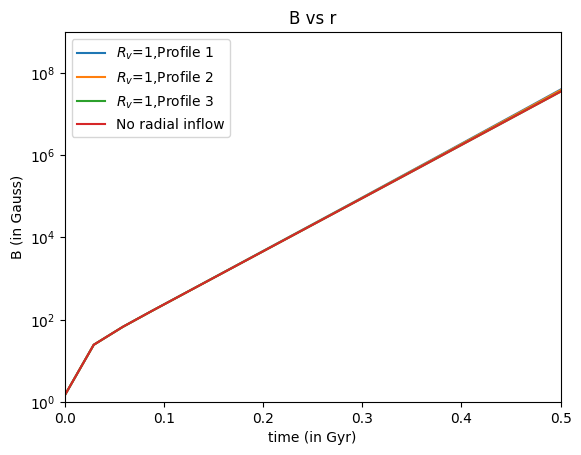

In [190]:
#trial_names=['TRIAL4','TRIAL5','TRIAL6','TRIAL7','TRIAL8','TRIAL9','TRIAL10','TRIAL12','TRIAL13']
trial_names=['TRIAL4','TRIAL5','TRIAL6','TRIAL10']

legends=[r'$R_v$=1,Profile 1',r'$R_v$=1,Profile 2',r'$R_v$=1,Profile 3','No radial inflow']
for i in range(len(trial_names)):
    
    list_B=np.load(trial_names[i]+'B_list.npy')

    
    total_time = (((list_B.shape)[1] - 1) // frames_per_unitT)
    times = np.linspace(0, total_time, list_B.shape[1])
    #select a radius r
    r_index=25
    B_r=list_B[0][:,r_index]
    B_phi=list_B[1][:,r_index]
    r=np.linspace(r_i,r_f,Nr)
    #calculate the strength
    B_strength=np.sqrt(B_r**2+B_phi**2)
    plt.plot(times*td_dim.value,B_strength)
plt.xlabel('time (in Gyr)')    
plt.ylabel('B (in Gauss)')
plt.xlim(0,0.5)
plt.ylim(1,10e8)
plt.title('B vs r')
plt.legend(legends)
plt.yscale('log')
plt.show()



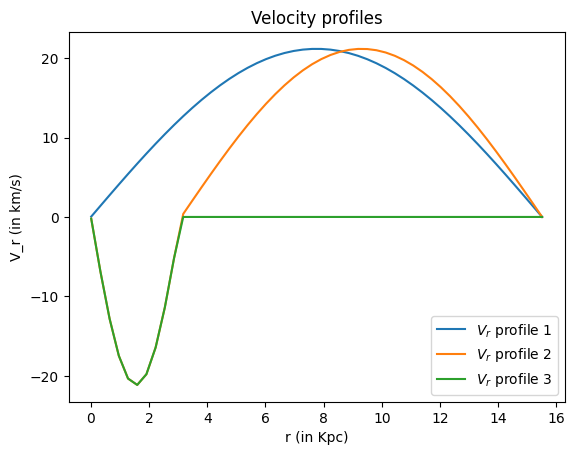

In [177]:
#plot all the velocity V_r we used
r=np.linspace(r_i,r_f,Nr)
V_r_1=np.sin(np.pi*r)
V_r_2=np.where(r<=r_omega,-np.sin(np.pi*r/r_omega),np.sin(np.pi*(r-r_omega)/(r_f-r_omega)))
V_r_3=np.where(r<=r_omega,-np.sin(np.pi*r/r_omega),0)
plt.plot(r*r_f_dim.value,V_r_1*(r_f_dim/td_dim).value)
plt.plot(r*r_f_dim.value,V_r_2*(r_f_dim/td_dim).value)
plt.plot(r*r_f_dim.value,V_r_3*(r_f_dim/td_dim).value)
plt.xlabel('r (in Kpc)')
plt.ylabel('V_r (in km/s)')
plt.title('Velocity profiles')
plt.legend([r'$V_r$ profile 1',r'$V_r$ profile 2',r'$V_r$ profile 3'])
plt.show()
